# Imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Constants

In [153]:
# Initialize Q table
num_states = 15
num_actions = 2

# Set hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 250  # Number of episodes

# Functions

In [169]:
# Define the reward function
def get_reward(state, action):
    if state == num_states-2 and action == 1:
        return 1
    else:
        return 0

# Learning Algorithms

In [170]:
# Define the Q-learning algorithm
def q_learning():
    q_table = np.zeros((num_states, num_actions))
    for i in range(num_episodes):
        # Reset the environment
        state = 0
        done = False

        while not done:
            # Choose an action
            if np.random.uniform() < epsilon:
                action = np.random.randint(num_actions)
            else:
                action = np.argmax(q_table[state])
            
            # Take the action and observe the reward and next state
            reward = get_reward(state, action)
            next_state = state + 1 if action == 1 else state
            
            # Update the Q table
            q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

            # Update the current state and check if the episode is done
            state = next_state
            if state == num_states - 1:
                done = True

    return q_table

# Define the Sarsa algorithm
def sarsa():
    q_table = np.zeros((num_states, num_actions))
    for i in range(num_episodes):
        # Reset the environment
        state = 0
        done = False
        
        # Choose an action using epsilon-greedy policy
        if np.random.uniform() < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(q_table[state])
        
        while not done:
            # Take the action and observe the reward and next state
            reward = get_reward(state, action)
            next_state = state + 1 if action == 1 else state
            
            # Choose the next action using epsilon-greedy policy
            if np.random.uniform() < epsilon:
                next_action = np.random.randint(num_actions)
            else:
                next_action = np.argmax(q_table[next_state])
            
            # Update the Q table using SARSA update rule
            q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * q_table[next_state, next_action] - q_table[state, action])
            
            # Update the current state and action and check if the episode is done
            state = next_state
            action = next_action
            if state == num_states - 1:
                done = True
    
    return q_table
    
# Define the Expected SARSA algorithm
def expected_sarsa():
    q_table = np.zeros((num_states, num_actions))
    for i in range(num_episodes):
        # Reset the environment
        state = 0
        done = False

        while not done:
            # Choose an action
            if np.random.uniform() < epsilon:
                action = np.random.randint(num_actions)
            else:
                action_values = q_table[state]
                action_probabilities = np.ones(num_actions) * epsilon / num_actions
                best_action = np.argmax(action_values)
                action_probabilities[best_action] += 1 - epsilon
                action = np.random.choice(np.arange(num_actions), p=action_probabilities)

            # Take the action and observe the reward and next state
            reward = get_reward(state, action)
            next_state = state + 1 if action == 1 else state
            
            # Calculate the expected Q value for the next state
            next_action_values = q_table[next_state]
            next_action_probabilities = np.ones(num_actions) * epsilon / num_actions
            best_next_action = np.argmax(next_action_values)
            next_action_probabilities[best_next_action] += 1 - epsilon
            expected_q_value = np.sum(next_action_probabilities * next_action_values)

            # Update the Q table
            q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * expected_q_value - q_table[state, action])

            # Update the current state and check if the episode is done
            state = next_state
            if state == num_states - 1:
                done = True

    return q_table
    

# Run the algorithm
q_table_q_learning = q_learning()

q_table_sarsa = sarsa() 

q_table_expected_sarsa = expected_sarsa()

# Visualization

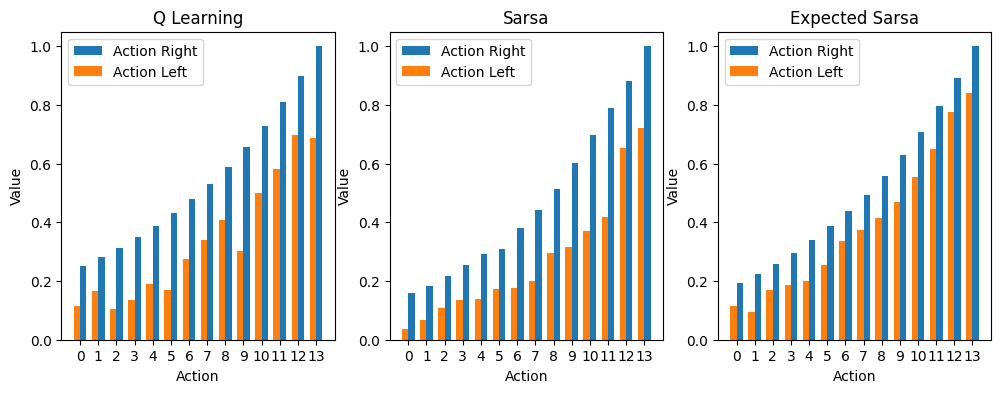

In [171]:
x = np.arange(num_states-1)
width = 0.35

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].bar(x + width/2, q_table_q_learning[:-1,1], width, label='Action Right')
ax[0].bar(x - width/2, q_table_q_learning[:-1,0], width, label='Action Left')

ax[0].set_xlabel('Action')
ax[0].set_ylabel('Value')
ax[0].set_xticks(x)
ax[0].legend()
ax[0].set_title('Q Learning')

ax[1].bar(x + width/2, q_table_sarsa[:-1,1], width, label='Action Right')
ax[1].bar(x - width/2, q_table_sarsa[:-1,0], width, label='Action Left')

ax[1].set_xlabel('Action')
ax[1].set_ylabel('Value')
ax[1].set_xticks(x)
ax[1].legend()
ax[1].set_title('Sarsa')

ax[2].bar(x + width/2, q_table_expected_sarsa[:-1,1], width, label='Action Right')
ax[2].bar(x - width/2, q_table_expected_sarsa[:-1,0], width, label='Action Left')

ax[2].set_xlabel('Action')
ax[2].set_ylabel('Value')
ax[2].set_xticks(x)
ax[2].legend()
ax[2].set_title('Expected Sarsa')


plt.show()